In [1]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2,FasterRCNN_ResNet50_FPN_V2_Weights
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as T

In [2]:
model = fasterrcnn_resnet50_fpn_v2(weights=FasterRCNN_ResNet50_FPN_V2_Weights)
model.eval()

c:\Users\get2b\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [1]:
COCO_INSTANCE_CATEGORY_NAMES = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
                                'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 
                                'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 
                                'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 
                                'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
                                'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 
                                'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 
                                'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [3]:
len(COCO_INSTANCE_CATEGORY_NAMES)

91

In [4]:
def get_prediction(img_path, threshold):
	"""
      get_prediction
          parameters:
            - img_path - path of the input image
            - threshold - threshold value for prediction score
      method:
        - Image is obtained from the image path
        - the image is converted to image tensor using PyTorch's Transforms
        - image is passed through the model to get the predictions
        - class, box coordinates are obtained, but only prediction score > threshold
          are chosen.
      
    """
	img = Image.open(img_path)
	transform = T.Compose([T.ToTensor()])
	img = transform(img)
	pred = model([img])
	pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
	pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
	pred_score = list(pred[0]['scores'].detach().numpy())
	pred_t = [pred_score.index(x) for x in pred_score if x>threshold][-1]
	pred_boxes = pred_boxes[:pred_t+1]
	pred_class = pred_class[:pred_t+1]
	return pred_boxes, pred_class

In [15]:
def object_detection_api(img_path, threshold=0.5, rect_th=1, text_size=0.5, text_th=1): 
    boxes, pred_cls = get_prediction(img_path, threshold) 
    # Get predictions 
    img = cv2.imread(img_path) 
    # Read image with cv2 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    # Convert to RGB 
    plt.figure(figsize=(10,10))
    for i in range(len(boxes)): 
        cv2.rectangle(img, [int(boxes[i][0][0]), int(boxes[i][0][1])], [int(boxes[i][1][0]), int(boxes[i][1][1])], color=(0, 255, 0), thickness=rect_th) 
        # Draw Rectangle with the coordinates 
        cv2.putText(img,pred_cls[i], [int(boxes[i][0][0]), int(boxes[i][0][1])], cv2.FONT_HERSHEY_COMPLEX, text_size, (0,255,0),thickness=text_th) 
        # Write the prediction class 
        # display the output image 
        plt.xticks([]) 
        plt.yticks([]) 
    plt.imshow(img) 

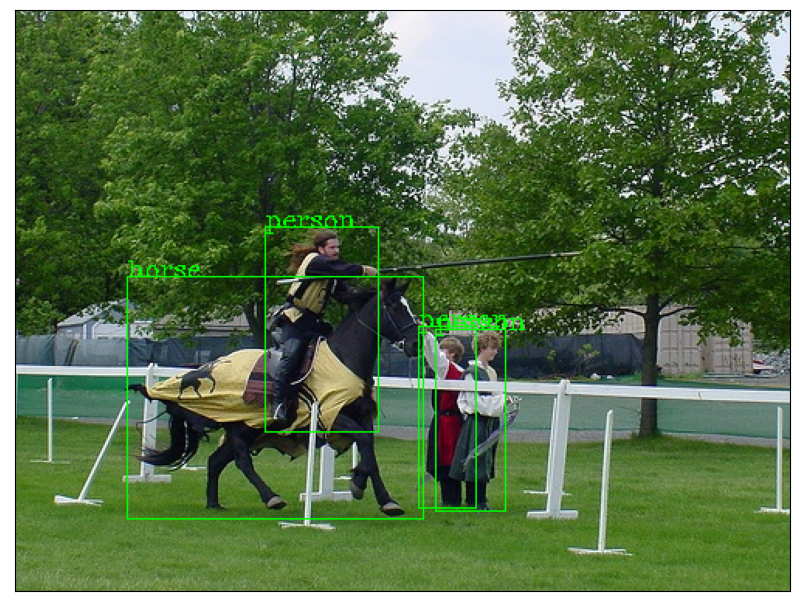

In [16]:
object_detection_api(r'C:\Users\get2b\Desktop\Arav\AI ML\DATA SETS\Neural Network Datasets\Object Detection\VOCdevkit\VOC2007\JPEGImages\\000009.jpg', threshold=0.8)